In [1]:
import pandas as pd

In [3]:
tcab_train = pd.read_csv('./train.csv')

In [4]:
tcab_train

,scenario,target_model_dataset,target_model_train_dataset,target_model,attack_toolchain,attack_name,original_text,original_output,ground_truth,status,perturbed_text,perturbed_output,attack_time,num_queries,frac_words_changed,test_index,original_text_identifier,unique_src_instance_identifier,pk
0,abuse,hatebase,hatebase,bert,openattack,textbugger,"""@KelsieBelsi: You're not a man if you refer t...",[0.00277859 0.99722147],1,success,"""@ KelsieBesi : You ' re not a men if you ref...",[0.5809263 0.4190737],5922.098629,-1,0.368421,0,77493,"('hatebase', 0, 77493)","('textbugger', 'openattack', 77493, 'abuse', '..."
1,abuse,hatebase,hatebase,bert,openattack,hotflip,"""@KelsieBelsi: You're not a man if you refer t...",[0.00277859 0.99722147],1,success,"""@ kelsiebelsi : you ' re not a boy without y...",[0.628556 0.371444],2184.083084,-1,0.368421,0,77493,"('hatebase', 0, 77493)","('hotflip', 'openattack', 77493, 'abuse', 'ber..."
2,abuse,hatebase,hatebase,bert,openattack,viper,"""@KelsieBelsi: You're not a man if you refer t...",[0.00277859 0.99722147],1,success,"""@KelsieBeᶅŝi: Yôǔ're not a mân if yôu rêḟer t...",[0.75858027 0.24141973],82.861893,-1,0.368421,0,77493,"('hatebase', 0, 77493)","('viper', 'openattack', 77493, 'abuse', 'bert'..."
3,abuse,hatebase,hatebase,roberta,openattack,viper,Ayo why da hell ain't nobody hip me to these n...,[0.01553293 0.984467 ],1,success,Âyô whŷ ḑa hell aîn't nôbody hîp mê ẗo thesê n...,[0.6907478 0.30925217],106.280187,-1,0.578947,0,126383,"('hatebase', 0, 126383)","('viper', 'openattack', 126383, 'abuse', 'robe..."
4,abuse,hatebase,hatebase,roberta,openattack,hotflip,Ayo why da hell ain't nobody hip me to these n...,[0.01553293 0.984467 ],1,success,Ayo how prosecutor jeez ina ' t anyone hip me...,[0.52406085 0.47593915],2295.363604,-1,0.368421,0,126383,"('hatebase', 0, 126383)","('hotflip', 'openattack', 126383, 'abuse', 'ro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448746,sentiment,climate-change_waterloo,climate-change_waterloo,xlnet,textattack,textfooler,#credlin Tuesday 14 August - the day Malcolm T...,"[0.9060629606246948, 0.055130716413259506, 0.0...",0,success,#credlin Tuesday 14 August - the day Malcolm T...,"[0.2100798487663269, 0.10203437507152557, 0.68...",0.670872,73,0.023256,31177,86874,"('climate-change_waterloo', 31177, 86874)","('textfooler', 'textattack', 86874, 'sentiment..."
1448747,sentiment,climate-change_waterloo,climate-change_waterloo,roberta,textattack,bae,#credlin Tuesday 14 August - the day Malcolm T...,"[0.9197883009910583, 0.054121337831020355, 0.0...",0,success,#credlin Tuesday 14 nd - the day Malcolm Turnb...,"[0.1625988781452179, 0.1085820198059082, 0.728...",4.607213,120,0.093023,31177,86874,"('climate-change_waterloo', 31177, 86874)","('bae', 'textattack', 86874, 'sentiment', 'rob..."
1448748,sentiment,climate-change_waterloo,climate-change_waterloo,bert,textattack,faster_genetic,#credlin Tuesday 14 August - the day Malcolm T...,"[0.9497579336166382, 0.03513958677649498, 0.01...",0,success,#credlin Tuesday 14 August - the day Malcolm T...,"[0.09094860404729843, 0.22097301483154297, 0.6...",3.143060,340,0.023256,31177,86874,"('climate-change_waterloo', 31177, 86874)","('faster_genetic', 'textattack', 86874, 'senti..."
1448749,sentiment,climate-change_waterloo,climate-change_waterloo,roberta,textattack,textfooler,#credlin Tuesday 14 August - the day Malcolm T...,"[0.9197883009910583, 0.054121337831020355, 0.0...",0,success,#credlin Tuesday 14 August - the day Malcolm T...,"[0.3632950186729431, 0.18174666166305542, 0.45...",0.511809,73,0.023256,31177,86874,"('climate-change_waterloo', 31177, 86874)","('textfooler', 'textattack', 86874, 'sentiment..."


In [5]:
tcab_train.status.value_counts()

success    896387
clean      552364
Name: status, dtype: int64

In [6]:
tcab_train.attack_name.value_counts()

clean             552364
deepwordbug       131245
textbugger        130053
viper             107616
pso                94688
textfooler         86591
pruthi             77634
iga_wang           76979
hotflip            72847
genetic            56172
bae                36683
faster_genetic     25879
Name: attack_name, dtype: int64

In [7]:
tcab_train.status.unique()

array(['success', 'clean'], dtype=object)

<AxesSubplot:>

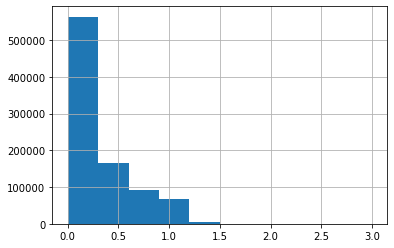

In [9]:
tcab_train[tcab_train.status == 'success'].frac_words_changed.hist()

<AxesSubplot:>

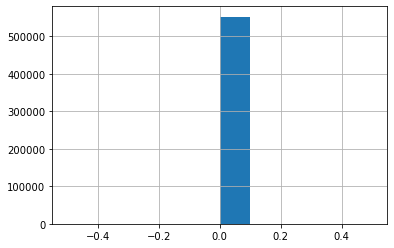

In [10]:
tcab_train[tcab_train.status != 'success'].frac_words_changed.hist()

In [11]:
import math

def logits_difference(text):
    if isinstance(text, str):
        # print(text)
        text2 = text[1:-1].strip()        
        if ',' in text2:
            new_arr = text2.split(',')
        else:
            new_arr = text2.split(' ')
        # print(new_arr)
        
        # if 'e-' in text:
        #     print(text)
        #     print(text2)
        #     print(new_arr)
        #     print(format(float(new_arr[0]), 'f'))
        #     print(format(float(new_arr[1]), 'f'))
        #     output = abs(float(format(float(new_arr[0]), 'f')) - float(format(float(new_arr[1]), 'f')))
        # else:
        output =  abs(float(new_arr[0]) - float(new_arr[-1]))
    else:
        output = None
    return output

In [26]:
tcab_train['logit_difference_perturbed_text'] = tcab_train.perturbed_output.apply(lambda x:logits_difference(x))
tcab_train['logit_difference_original_text'] = tcab_train.original_output.apply(lambda x:logits_difference(x))

SCENARIO -  abuse


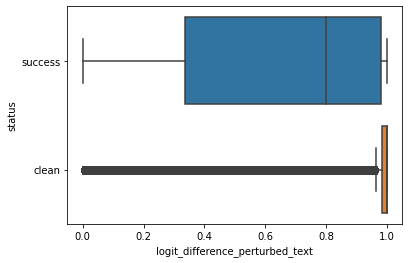

SCENARIO -  sentiment


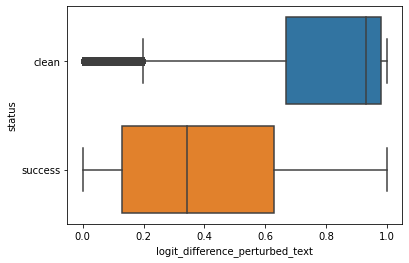

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
for scenario in tcab_train.scenario.unique():
    print('SCENARIO - ', scenario)
    sns.boxplot(data=tcab_train[tcab_train.scenario == scenario], x="logit_difference_perturbed_text", y="status")
    plt.show()

target_model -  bert


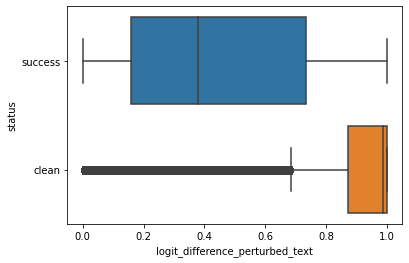

target_model -  roberta


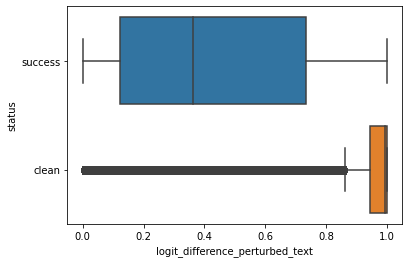

target_model -  xlnet


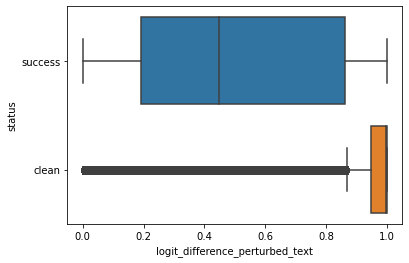

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
for target_model in tcab_train.target_model.unique():
    print('target_model - ', target_model)
    sns.boxplot(data=tcab_train[tcab_train.target_model == target_model], x="logit_difference_perturbed_text", y="status")
    plt.show()

attack name -  textbugger


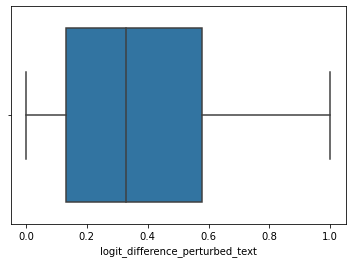

attack name -  hotflip


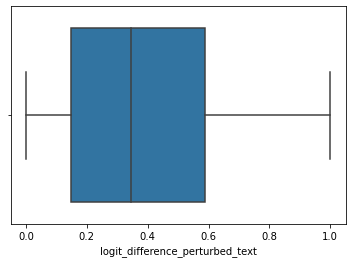

attack name -  viper


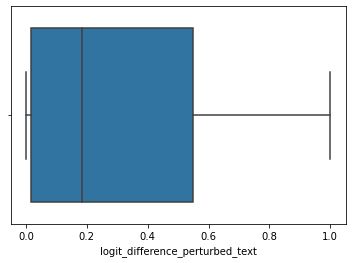

attack name -  clean


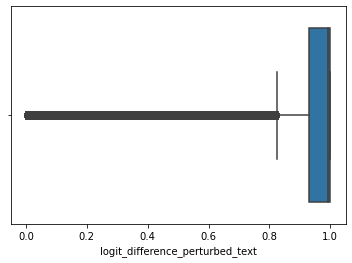

attack name -  genetic


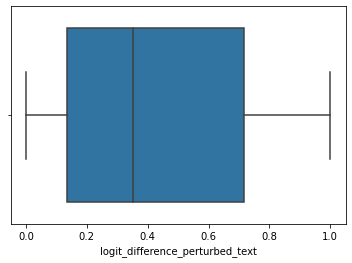

attack name -  textfooler


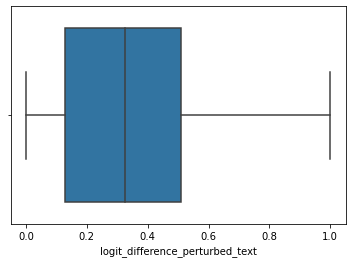

attack name -  deepwordbug


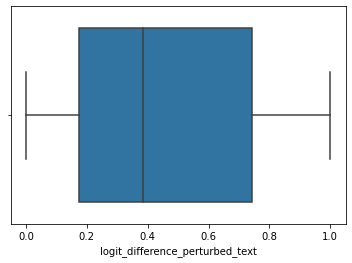

attack name -  iga_wang


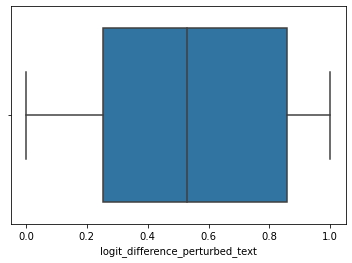

attack name -  bae


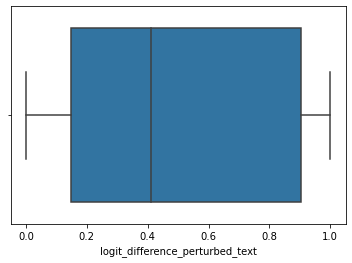

attack name -  faster_genetic


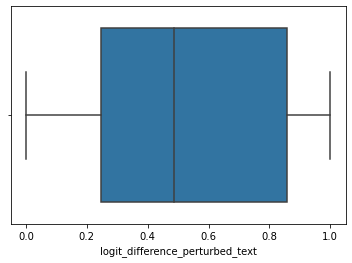

attack name -  pso


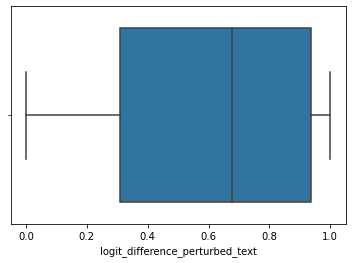

attack name -  pruthi


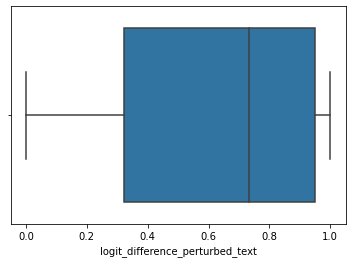

In [25]:
for attack_name in tcab_train.attack_name.unique():
    print('attack name - ', attack_name)
    sns.boxplot(x=tcab_train[tcab_train.attack_name == attack_name]["logit_difference_perturbed_text"])
    plt.show()

attack name -  textbugger


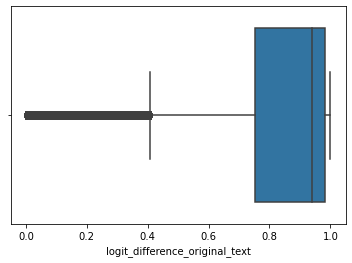

attack name -  hotflip


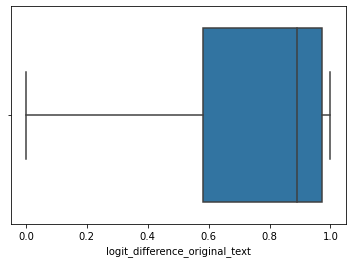

attack name -  viper


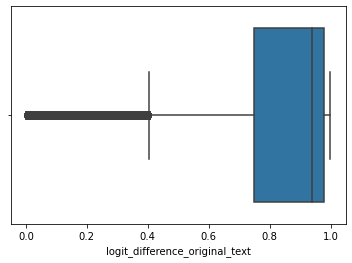

attack name -  clean


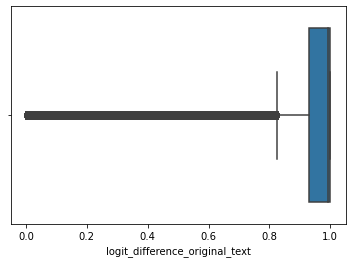

attack name -  genetic


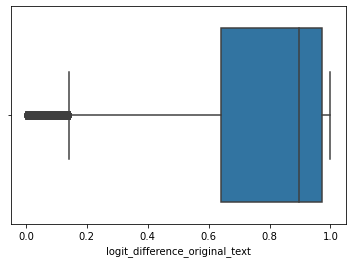

attack name -  textfooler


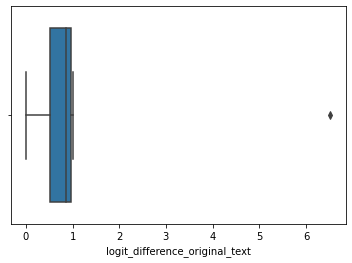

attack name -  deepwordbug


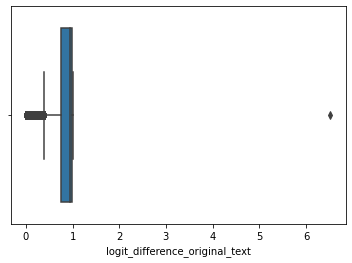

attack name -  iga_wang


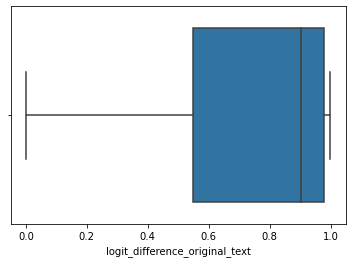

attack name -  bae


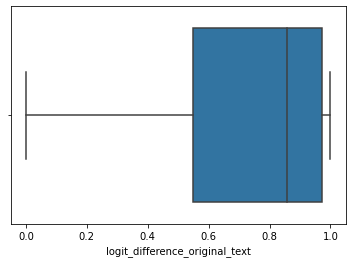

attack name -  faster_genetic


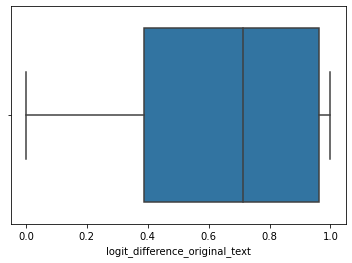

attack name -  pso


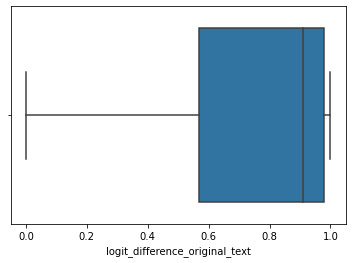

attack name -  pruthi


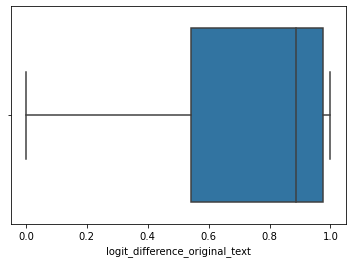

In [27]:
for attack_name in tcab_train.attack_name.unique():
    print('attack name - ', attack_name)
    sns.boxplot(x=tcab_train[tcab_train.attack_name == attack_name]["logit_difference_original_text"])
    plt.show()

In [30]:
tcab_train['original_to_perturbed_logit_second_difference'] = abs(tcab_train['logit_difference_original_text'] -  tcab_train['logit_difference_perturbed_text'])

attack name -  textbugger


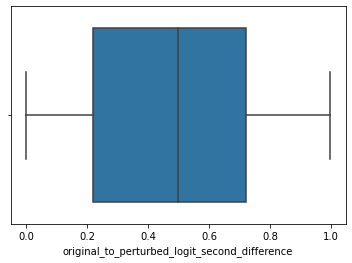

attack name -  hotflip


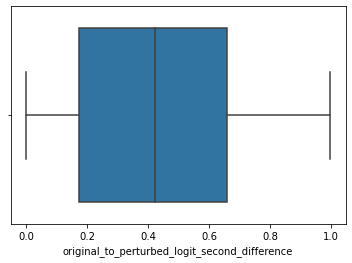

attack name -  viper


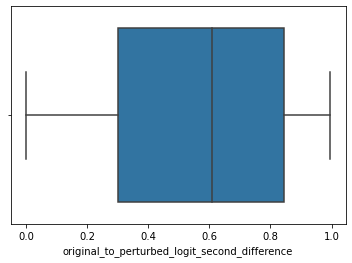

attack name -  clean


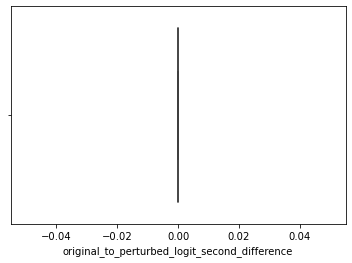

attack name -  genetic


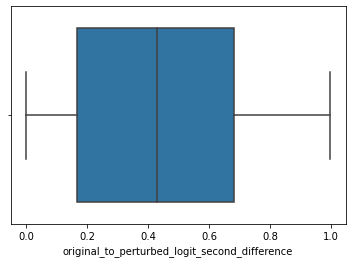

attack name -  textfooler


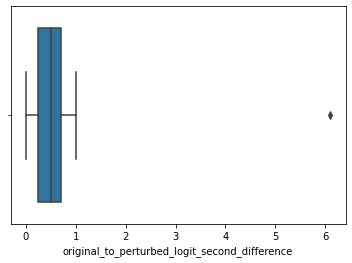

attack name -  deepwordbug


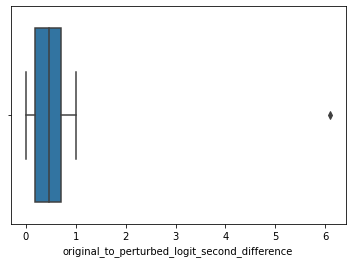

attack name -  iga_wang


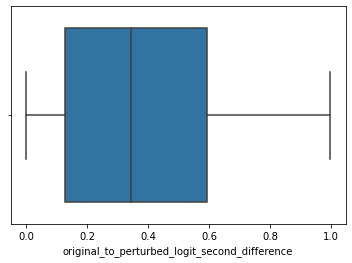

attack name -  bae


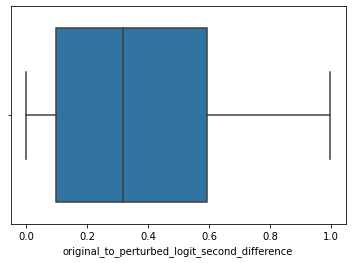

attack name -  faster_genetic


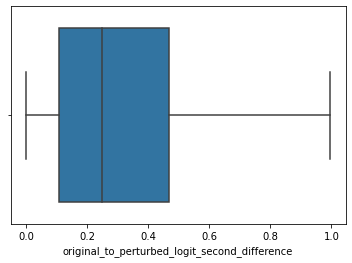

attack name -  pso


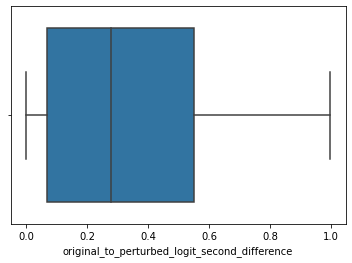

attack name -  pruthi


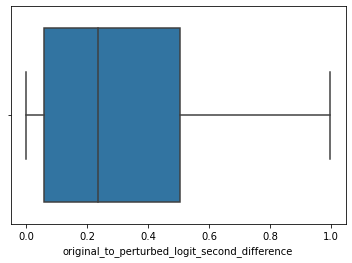

In [31]:
for attack_name in tcab_train.attack_name.unique():
    print('attack name - ', attack_name)
    sns.boxplot(x=tcab_train[tcab_train.attack_name == attack_name]["original_to_perturbed_logit_second_difference"])
    plt.show()

attack name -  textbugger


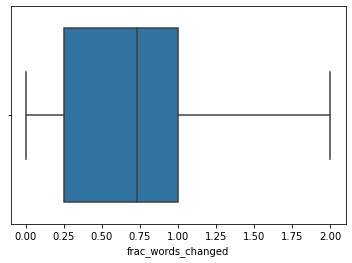

attack name -  hotflip


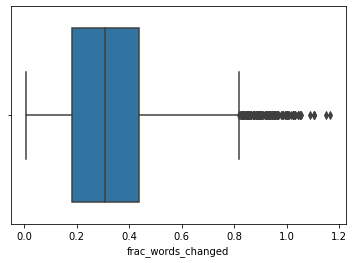

attack name -  viper


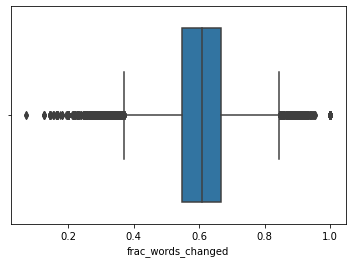

attack name -  clean


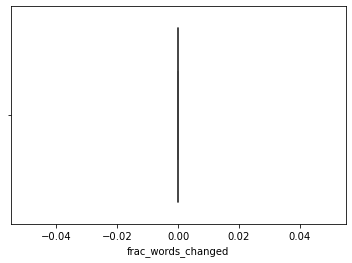

attack name -  genetic


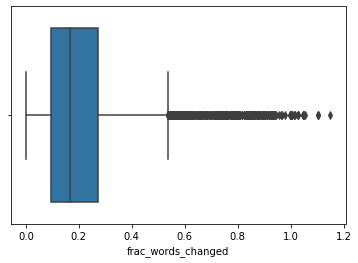

attack name -  textfooler


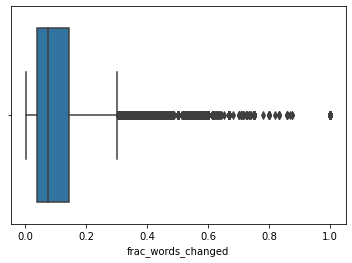

attack name -  deepwordbug


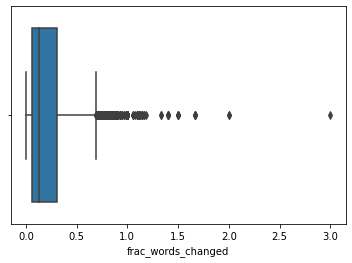

attack name -  iga_wang


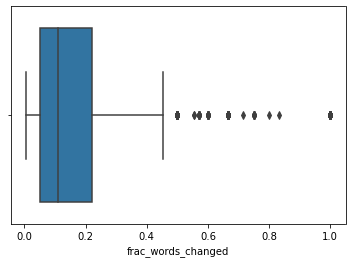

attack name -  bae


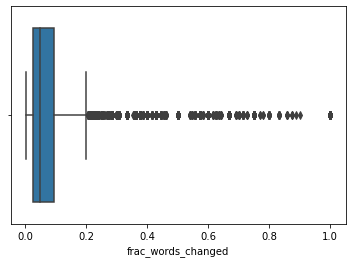

attack name -  faster_genetic


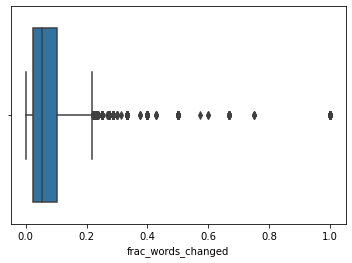

attack name -  pso


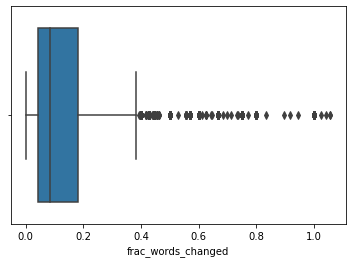

attack name -  pruthi


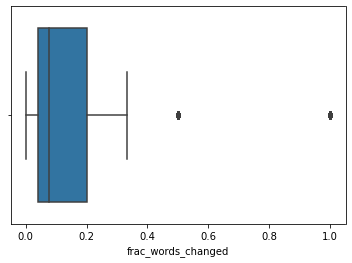

In [35]:
for attack_name in tcab_train.attack_name.unique():
    print('attack name - ', attack_name)
    sns.boxplot(x=tcab_train[tcab_train.attack_name == attack_name]["frac_words_changed"])
    plt.show()

In [41]:
tcab_train.groupby(['attack_name', 'target_model']).mean()

ground_truth    attack_time  num_queries  \
attack_name    target_model                                             
bae            bert              1.119645       2.880698   112.571552   
               roberta           1.010890       2.686720   117.219152   
               xlnet             1.259161       1.968873    75.027756   
clean          bert              0.330145       0.000000     0.000000   
               roberta           0.339623       0.000000     0.000000   
               xlnet             0.328041       0.000000     0.000000   
deepwordbug    bert              1.116758     887.220235    33.738090   
               roberta           1.027949     650.023521    76.053708   
               xlnet             1.094843    1424.810480    33.631322   
faster_genetic bert              1.215987       5.174106   377.359780   
               roberta           0.954708       6.634903   376.666234   
               xlnet             1.003502       6.357396   370.088493   
genetic        bert              0.948759  220193.533800    32.024969   
               roberta           0.923598  217969.710597    33.624126   
               xlnet             1.100281  120007.837337    34.233511   
hotflip        bert              1.019633   44586.609554    -1.000000   
               roberta           1.093643   48612.679163    -1.000000   
               xlnet             1.030961   93482.197661    -1.000000   
iga_wang       bert              1.007416       1.625624   193.843598   
               roberta           1.002514       1.502832   194.568567   
               xlnet             1.073597       1.874970   195.091742   
pruthi         bert              0.966818       3.046978   275.650434   
               roberta           0.955705       2.673063   265.451198   
               xlnet             1.022838       3.440577   284.939519   
pso            bert              0.963290       3.322843   233.925577   
               roberta           0.984353       2.662876   230.490799   
               xlnet             1.047648     345.846711   234.055788   
textbugger     bert              1.068106   65211.331350    31.194115   
               roberta           1.004799  231582.387572     6.484680   
               xlnet             0.972810  180991.847083    19.576701   
textfooler     bert              1.318610       1.453042   122.531041   
               roberta           1.353950       1.404125   133.368419   
               xlnet             1.301719       1.674456   115.086610   
viper          bert              0.931414    9867.642464    -1.000000   
               roberta           0.930520    8302.840961    -1.000000   
               xlnet             1.234025   34942.697461    -1.000000   

                             frac_words_changed    test_index  \
attack_name    target_model                                     
bae            bert                    0.078359  40252.306135   
               roberta                 0.081963  43747.158042   
               xlnet                   0.086008  40517.054265   
clean          bert                    0.000000  59419.255075   
               roberta                 0.000000  59414.547742   
               xlnet                   0.000000  59421.859247   
deepwordbug    bert                    0.239216  27643.341253   
               roberta                 0.220862  24050.981087   
               xlnet                   0.228253  27395.517183   
faster_genetic bert                    0.080488  37981.209512   
               roberta                 0.080655  63840.263961   
               xlnet                   0.080806  62192.532707   
genetic        bert                    0.222374  29912.245919   
               roberta                 0.220926  31630.599530   
               xlnet                   0.203315  33917.190815   
hotflip        bert                    0.344296  29110.805978   
               roberta                 0.358159  28115.635744   
               xlne

In [16]:
for scenario in tcab_train.scenario.unique():
    
    print(tcab_train[tcab_train.scenario == scenario].status.value_counts())

clean      388458
success    197009
Name: status, dtype: int64
success    699378
clean      163906
Name: status, dtype: int64


In [20]:
max(tcab_train[tcab_train.status == 'success'].logit_difference_perturbed_text), min(tcab_train[tcab_train.status == 'success'].logit_difference_perturbed_text)

(0.9999649866895197, 5.699999999775329e-07)

In [21]:
max(tcab_train[tcab_train.status != 'success'].logit_difference_perturbed_text), min(tcab_train[tcab_train.status != 'success'].logit_difference_perturbed_text)

(0.9999817415092099, 3.489999999994886e-06)

In [42]:
tcab_train.sort_values('logit_difference_perturbed_text', ascending=False)

,scenario,target_model_dataset,target_model_train_dataset,target_model,attack_toolchain,attack_name,original_text,original_output,ground_truth,status,...,attack_time,num_queries,frac_words_changed,test_index,original_text_identifier,unique_src_instance_identifier,pk,logit_difference_perturbed_text,logit_difference_original_text,original_to_perturbed_logit_second_difference
198339,abuse,civil_comments,civil_comments,xlnet,none,clean,The timing isn't all that surprising... Interc...,[9.99990871e-01 9.12949079e-06],0,clean,...,0.000000,0,0.000000,65312,302360,"('civil_comments', 65312, 302360)","('clean', 'none', 302360, 'abuse', 'xlnet', 'c...",9.999817e-01,0.999982,0.000000
368388,abuse,civil_comments,civil_comments,xlnet,none,clean,It was already known at the time Premier Clark...,[9.99990227e-01 9.77252542e-06],0,clean,...,0.000000,0,0.000000,129913,214642,"('civil_comments', 129913, 214642)","('clean', 'none', 214642, 'abuse', 'xlnet', 'c...",9.999805e-01,0.999980,0.000000
156430,abuse,civil_comments,civil_comments,xlnet,none,clean,"Well, this article makes it clear that there w...",[9.99989865e-01 1.01352091e-05],0,clean,...,0.000000,0,0.000000,49577,332774,"('civil_comments', 49577, 332774)","('clean', 'none', 332774, 'abuse', 'xlnet', 'c...",9.999797e-01,0.999980,0.000000
136224,abuse,civil_comments,civil_comments,xlnet,none,clean,Could you clarify as to how the zoo is current...,[9.99989805e-01 1.01950118e-05],0,clean,...,0.000000,0,0.000000,42144,139950,"('civil_comments', 42144, 139950)","('clean', 'none', 139950, 'abuse', 'xlnet', 'c...",9.999796e-01,0.999980,0.000000
31052,abuse,civil_comments,civil_comments,xlnet,none,clean,"Adding in, again, a piece from the past, and t...",[9.9998970e-01 1.0300323e-05],0,clean,...,0.000000,0,0.000000,2160,112086,"('civil_comments', 2160, 112086)","('clean', 'none', 112086, 'abuse', 'xlnet', 'c...",9.999794e-01,0.999979,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908017,sentiment,sst,sst,bert,openattack,viper,is better than any summer blockbuster,[0.03767817 0.9623219 ],1,success,...,8163.970071,-1,0.666667,32235,422186,"('sst', 32235, 422186)","('viper', 'openattack', 422186, 'sentiment', '...",2.400000e-06,0.924644,0.924641
934107,sentiment,imdb,imdb,roberta,openattack,textbugger,044: The Big Trail (1930) - released 10/24/193...,[0.09514022 0.90485984],1,success,...,265736.994914,-1,1.005111,2239,94423,"('imdb', 2239, 94423)","('textbugger', 'openattack', 94423, 'sentiment...",1.760000e-06,0.809720,0.809718
1396608,sentiment,climate-change_waterloo,climate-change_waterloo,roberta,textattack,textfooler,Upside: forecast no longer includes temps in t...,"[0.006995252799242735, 0.027809487655758858, 0...",2,success,...,0.491919,64,0.074074,26958,325306,"('climate-change_waterloo', 26958, 325306)","('textfooler', 'textattack', 325306, 'sentimen...",1.192093e-06,0.958200,0.958199
1378748,sentiment,climate-change_waterloo,climate-change_waterloo,roberta,openattack,viper,Ever wonder why @TurnbullMalcolm #LNP gave $44...,[0.02121123 0.24779297 0.7309958 ],2,success,...,9502.164781,-1,0.357143,25516,149900,"('climate-change_waterloo', 25516, 149900)","('viper', 'openattack', 149900, 'sentiment', '...",1.120000e-06,0.709785,0.709783


In [49]:
civil_comments_tcab_train = tcab_train[(tcab_train.target_model_dataset == 'civil_comments')
                                      & (tcab_train.attack_name != 'clean')
                                      ]

In [52]:
import sklearn
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(civil_comments_tcab_train.perturbed_text, civil_comments_tcab_train.attack_name, test_size=0.2, random_state=42)

In [62]:
from keras.preprocessing.text import Tokenizer
vocab_size = 1000000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [63]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'to': 3,
 'and': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'you': 8,
 'in': 9,
 'that': 10,
 'are': 11,
 'it': 12,
 'i': 13,
 'for': 14,
 'this': 15,
 'they': 16,
 'not': 17,
 'he': 18,
 'be': 19,
 'on': 20,
 'with': 21,
 'have': 22,
 'as': 23,
 "'": 24,
 'your': 25,
 'all': 26,
 'what': 27,
 'but': 28,
 'or': 29,
 'was': 30,
 'his': 31,
 'who': 32,
 'we': 33,
 'so': 34,
 'trump': 35,
 'their': 36,
 'if': 37,
 'no': 38,
 'people': 39,
 'like': 40,
 'just': 41,
 'will': 42,
 'an': 43,
 'do': 44,
 'by': 45,
 'at': 46,
 'about': 47,
 'out': 48,
 'up': 49,
 's': 50,
 'has': 51,
 'from': 52,
 'can': 53,
 'one': 54,
 'them': 55,
 'would': 56,
 'how': 57,
 'get': 58,
 'more': 59,
 'when': 60,
 'there': 61,
 'our': 62,
 't': 63,
 'my': 64,
 "don't": 65,
 'us': 66,
 'these': 67,
 'should': 68,
 'any': 69,
 'know': 70,
 'him': 71,
 'now': 72,
 'right': 73,
 'then': 74,
 'because': 75,
 'only': 76,
 'were': 77,
 'than': 78,
 'why': 79,
 "it's": 80,
 'me': 81,
 'think': 82,
 'been'

In [71]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [66]:
X_train_sequences[:10]

[[2,
  2050,
  1383,
  271,
  125,
  8626,
  34815,
  3,
  98,
  5,
  21833,
  4264,
  14,
  5,
  16719,
  24,
  50,
  23889,
  86,
  2154,
  10838,
  11,
  13676,
  10382,
  3,
  27855,
  17464,
  2,
  12501,
  9984,
  4,
  1030,
  6,
  31872,
  39379,
  510,
  4,
  31,
  864,
  2351,
  16,
  22,
  379,
  806,
  19074,
  473,
  4063,
  7625,
  864,
  650,
  4,
  12164,
  3,
  2018,
  69,
  34816,
  15300,
  21,
  2,
  11886,
  23,
  2,
  1881,
  34817,
  1454,
  36,
  10622,
  1676,
  2,
  1289,
  3370,
  7,
  3581,
  4,
  16008,
  23,
  5290,
  3,
  69,
  2840,
  6,
  6212,
  4,
  3867,
  356,
  941,
  2,
  691,
  50,
  9444,
  69,
  6666,
  1227,
  7,
  26379,
  384,
  11371,
  2903,
  4360,
  7281,
  4832,
  9248,
  384,
  2,
  2093,
  4494,
  8914,
  4,
  25040,
  11,
  2,
  2288,
  5206,
  13258,
  26380,
  3,
  31873,
  2,
  15301,
  6,
  4034,
  4035,
  5097,
  2195,
  2601,
  473,
  2,
  177,
  4678,
  7,
  2,
  1210,
  3,
  146,
  69,
  6,
  67,
  1542,
  2155,
  1044,
  9,
 

In [67]:
max_length = 100
padding_type='post'
truncation_type='post'

In [72]:
from keras.utils import pad_sequences

X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)

In [73]:
X_train_padded

array([[    2,  2050,  1383, ...,  2903,  4360,  7281],
       [   40,  1308,    40, ...,     0,     0,     0],
       [    4,   129,    77, ...,     0,     0,     0],
       ...,
       [   38,  2358,    46, ...,     0,     0,     0],
       [   80,    17,    91, ...,     0,     0,     0],
       [ 4667, 13872,     0, ...,     0,     0,     0]])

In [82]:
import numpy as np
embeddings_index = {}
f = open('../../../NLP/Semantic Processing/semantic_processing-main/Distributional Semantics/codes/glove.6B.300d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [89]:
len(embeddings_index['about'])

300

In [90]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [122]:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)


y_train_encoded = encoder.fit_transform(
    np.reshape(np.array(y_train), (-1, 1))
              )

                                        
y_test_encoded = encoder.fit_transform(
    np.reshape(np.array(y_test), (-1, 1))
              )                                   


In [130]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=300,
                            weights=[embedding_matrix],
                            input_length=100,
                            trainable=False)

In [150]:
from tensorflow.keras.models import Sequential
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150)),
    Dense(128, activation='relu'),
   Dense(11, activation='softmax')
])

In [151]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [110]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [111]:
%load_ext tensorboard

In [1]:
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 10),
            TensorBoard(log_dir=log_folder)
            ]
num_epochs = 2
history = model.fit(X_train_padded, y_train_encoded, epochs=num_epochs, validation_data=(X_test_padded, y_test_encoded),callbacks=callbacks)